## Auto reload

In [1]:
%load_ext autoreload
%autoreload 2

## LIB

In [4]:
%reload_ext autoreload

# Basic lib
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# config
import yaml

# Custom lib
from src.loader import Loader
from src.loan_preprocessor import Loan_Preprocessor
from src.log_preprocessor import Log_Preprocessor
from src.user_preprocessor import User_Preprocessor
from src.cofix_preprocessor import Cofix_Preprocessor
from src.matcher import Matcher
from src.sampling import down_sampling, check_imbalanced_label, split_train_valid
from src.mice import mice
from src.bank import Bank_info
from src.clustering import Clustering, GowerDistance, KPrototype
from src.clustering_preprocessor import ClusteringPreprocessor
from src.statistic_check import TTEST,ANOVA
from sklearn.preprocessing import MinMaxScaler
from src.eda import EDA, EDAPreprocessing

# ignore warnings
pd.set_option('mode.chained_assignment',  None)
plt.style.use('ggplot')

## Load Config

In [8]:
with open("config.yaml", 'r') as config_file:
    config_dict = yaml.load(config_file, Loader=yaml.FullLoader)

## Load Data

In [9]:
loader_config = config_dict.get('Loader')

In [11]:
loader_config = config_dict.get('Loader')
loader = Loader(loader_config)
loan_df = loader.run('loan_result.csv')
log_df = loader.run('log_data.csv')
user_df = loader.run('user_spec.csv')
cofix_df = loader.run('cofix.csv')

# EDA

In [12]:
## diet
loan_trainer = EDAPreprocessing(loan_df)
log_trainer = EDAPreprocessing(log_df)
user_trainer = EDAPreprocessing(user_df)

loan = loan_trainer.diet_dataframe()
log = log_trainer.diet_dataframe()
user = user_trainer.diet_dataframe()

diet_dataframe Ìï®ÏàòÏùò ÏÜåÏöîÏãúÍ∞Ñ
: 8.59Ï¥à
diet_dataframe Ìï®ÏàòÏùò ÏÜåÏöîÏãúÍ∞Ñ
: 12.62Ï¥à
diet_dataframe Ìï®ÏàòÏùò ÏÜåÏöîÏãúÍ∞Ñ
: 2.62Ï¥à


## Loan EDA

Checking Distributions...


7it [11:58, 102.64s/it]



Done!


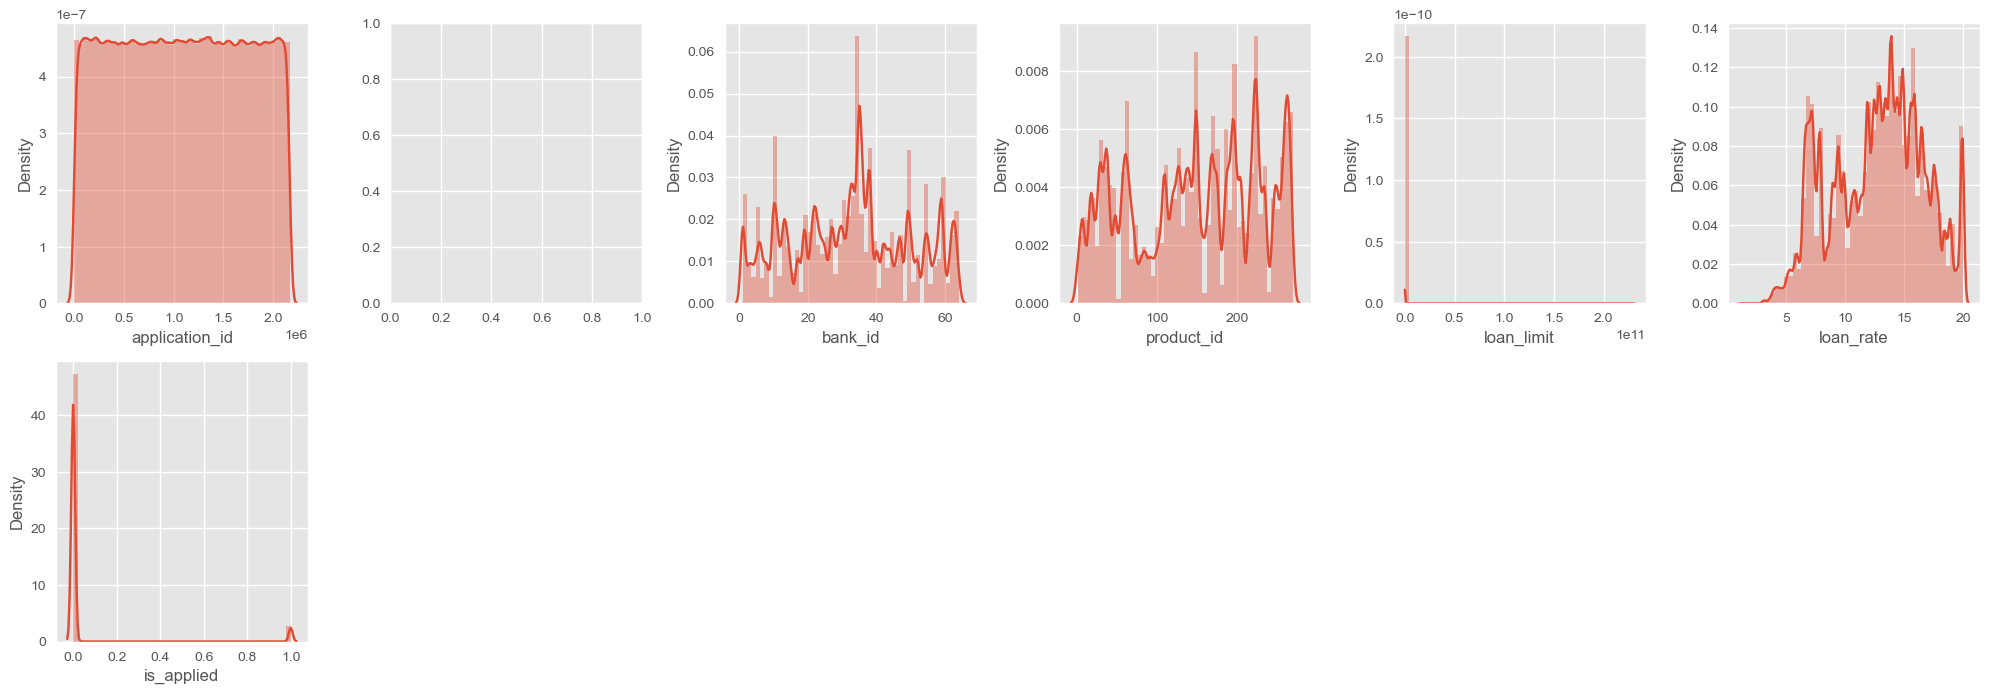

In [13]:
loan_eda = EDA(loan, 'loan_result')
loan_eda.check_distributions()

Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
Done!!


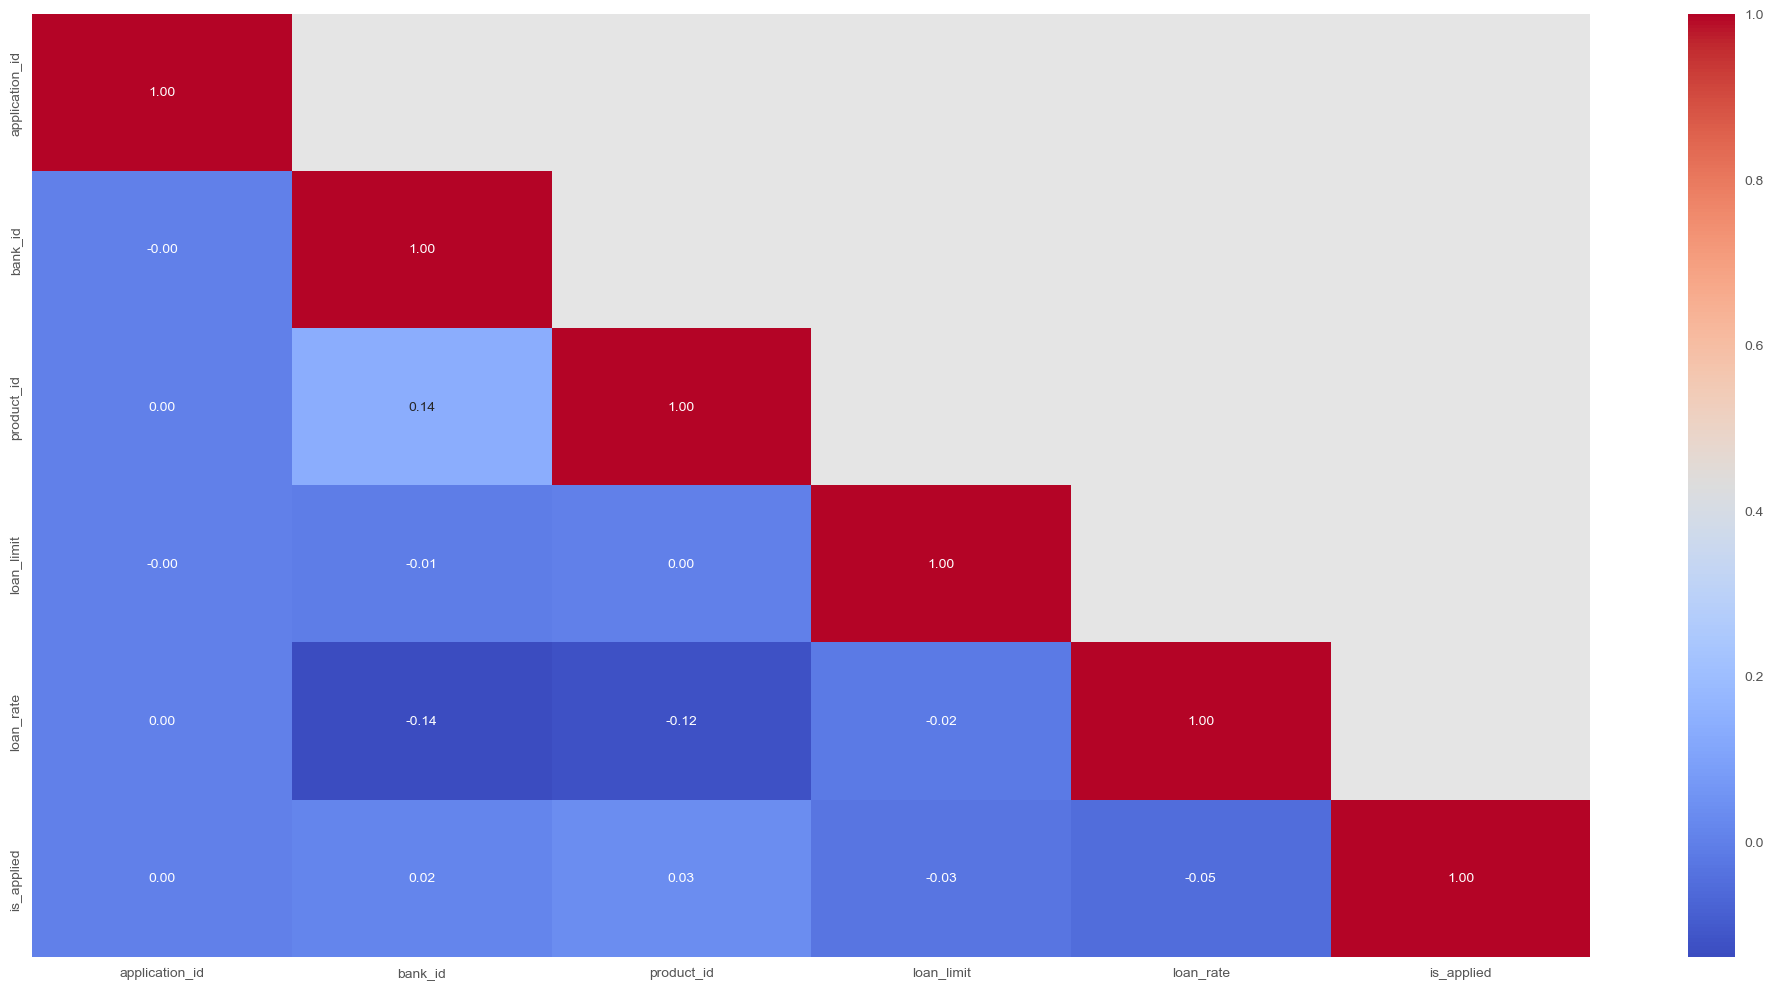

In [14]:
loan_eda.check_corr()

Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
üëÄÏπºÎüº Î≥Ñ Í≤∞Ï∏°Ïπò Ïàò
	 ‚ùó application_id : 0
	 ‚ùó loanapply_insert_time : 0
	 ‚ùó bank_id : 0
	 ‚ùó product_id : 0
	 ‚ùó loan_limit : 7495
	 ‚ùó loan_rate : 7495
	 ‚ùó is_applied : 3257239
Done!!


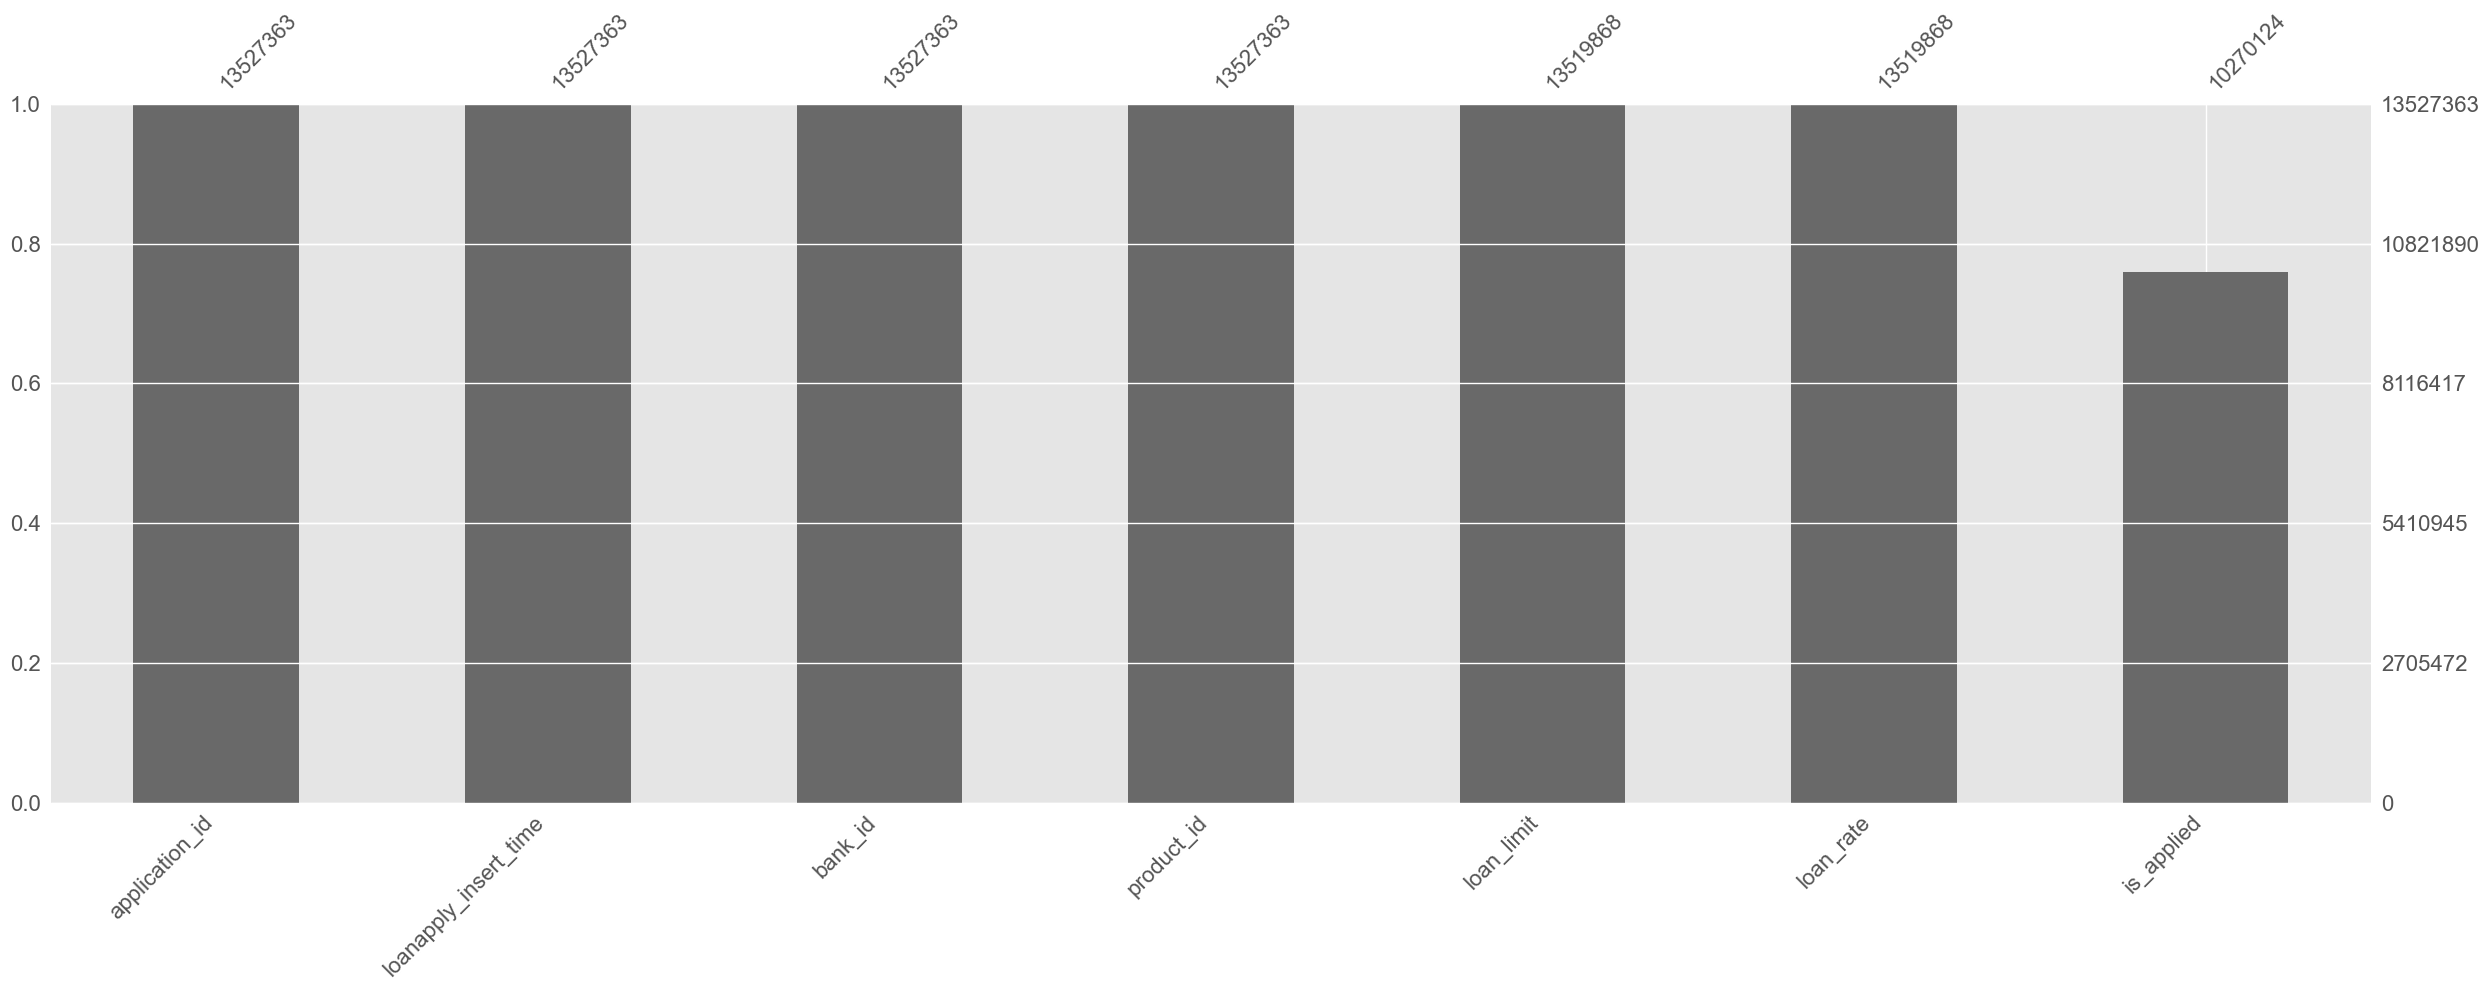

In [15]:
loan_eda.check_missing_values()

Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
ÌååÏïÖÎêú Ïó∞ÏÜçÌòï Î≥ÄÏàò
 ['application_id', 'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied']
Done!!


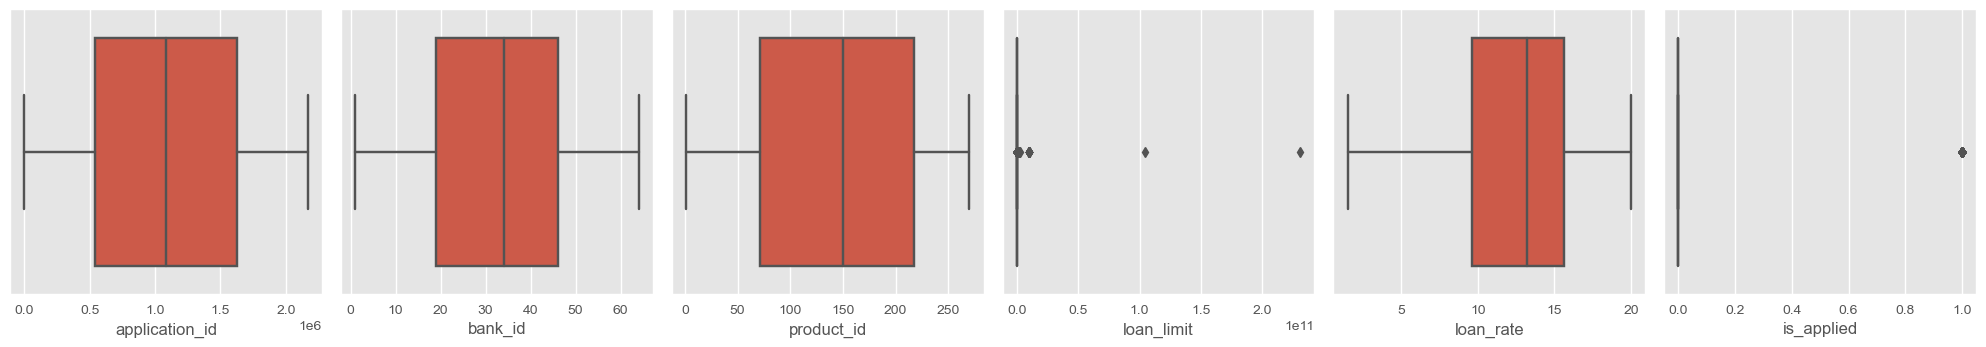

In [16]:
loan_eda.check_outliers()

## Log EDA

Checking Distributions...


6it [02:08, 21.40s/it] 

mp_app_version ÏπºÎüºÏùÄ ÎÑàÎ¨¥ ÎßéÏùÄ Î≤îÏ£ºÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Îã§Î•∏ Ï†ÑÏ≤òÎ¶¨Î•º Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§.

Done!


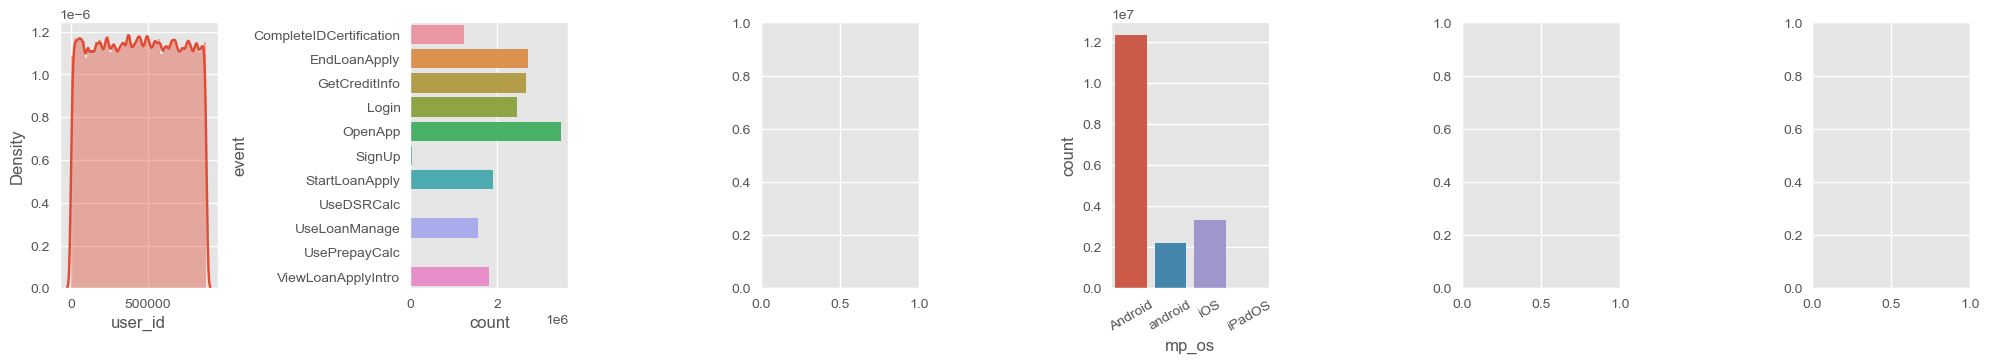

In [17]:
log_eda = EDA(log, 'log_data')
log_eda.check_distributions()

In [18]:
# log_eda.check_corr()

Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
üëÄÏπºÎüº Î≥Ñ Í≤∞Ï∏°Ïπò Ïàò
	 ‚ùó user_id : 0
	 ‚ùó event : 0
	 ‚ùó timestamp : 0
	 ‚ùó mp_os : 980
	 ‚ùó mp_app_version : 660597
	 ‚ùó date_cd : 0
Done!!


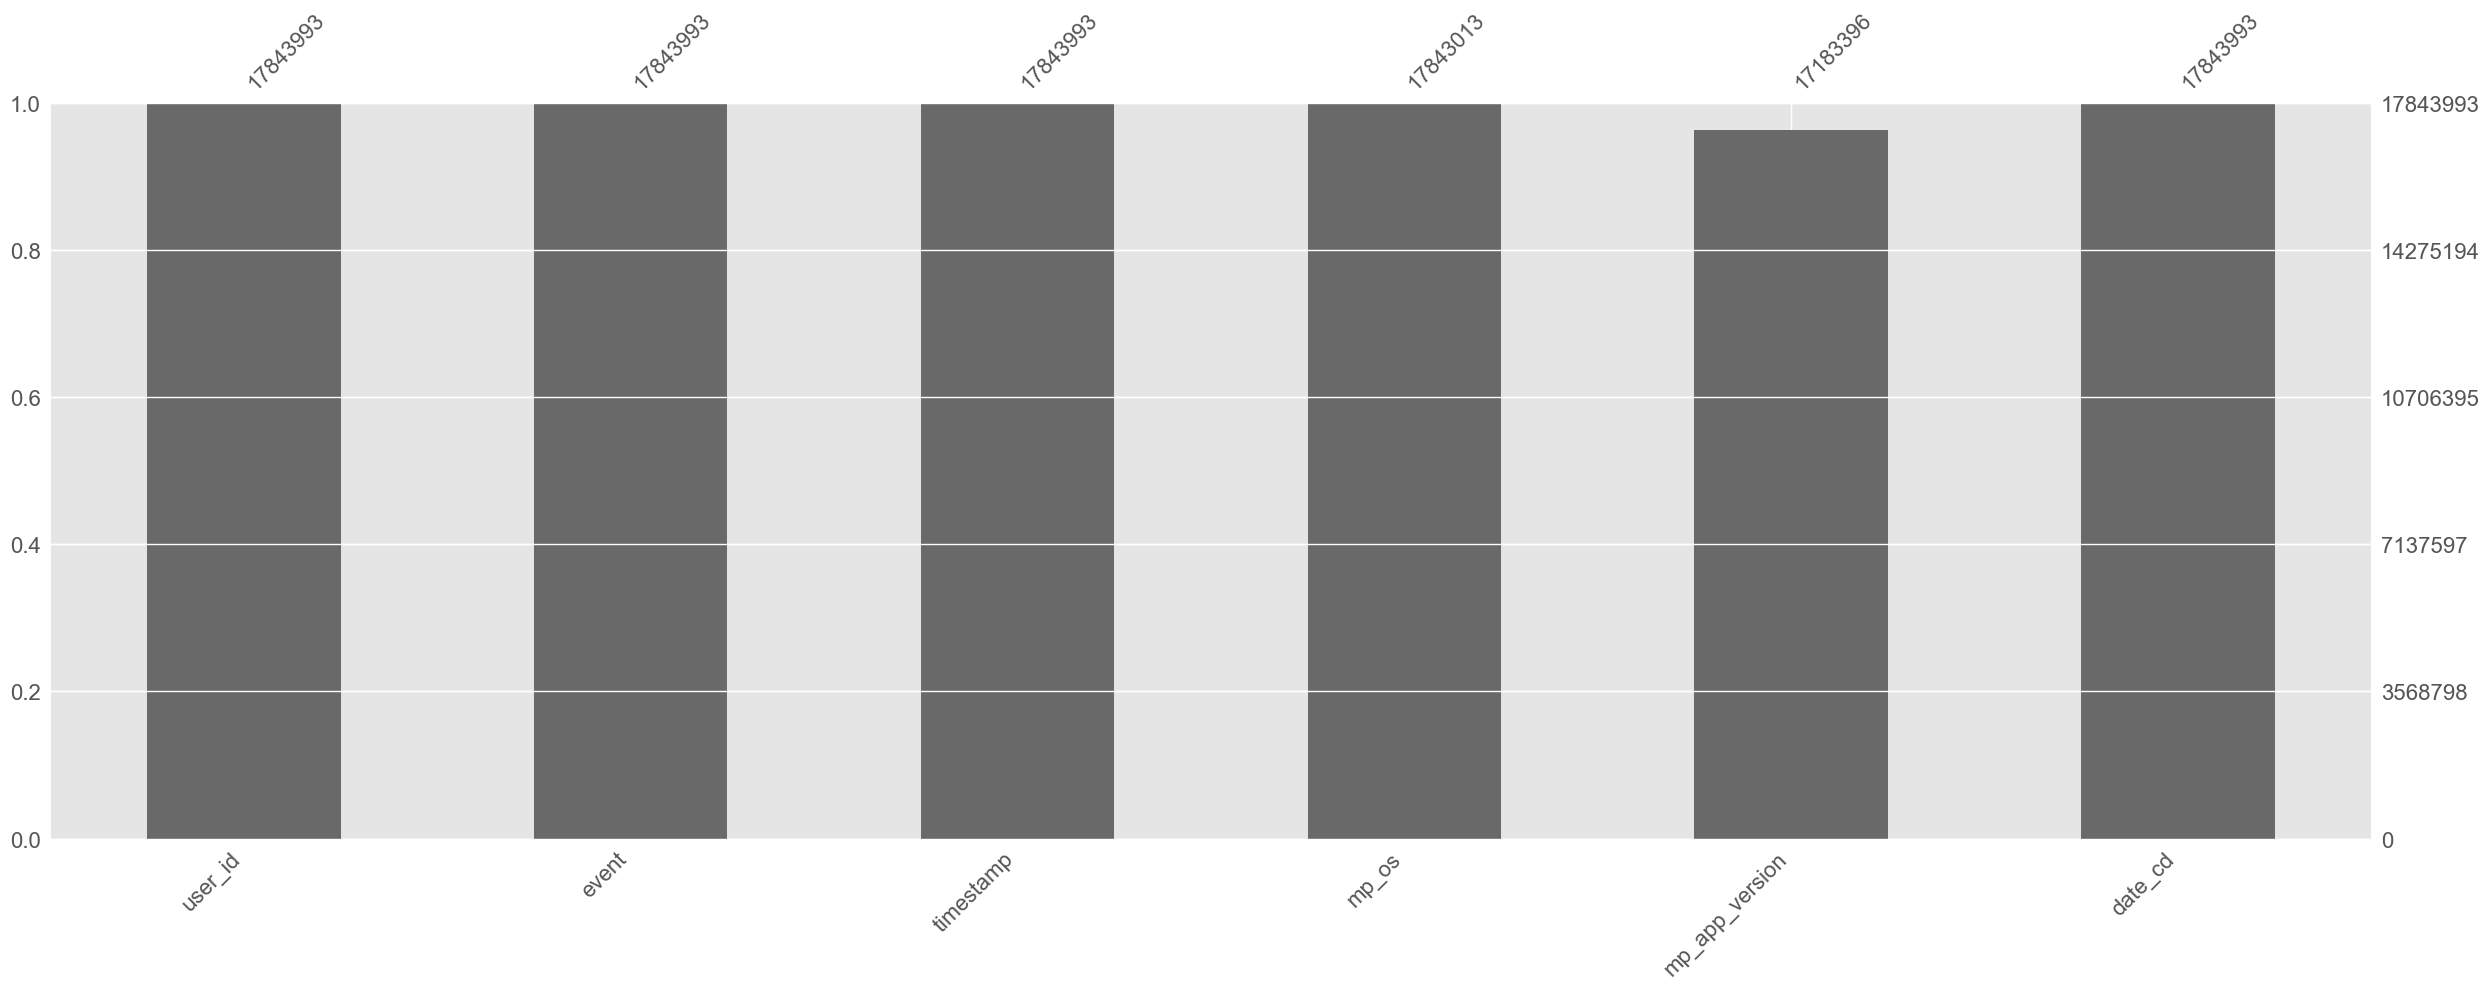

In [19]:
log_eda.check_missing_values()

Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
ÌååÏïÖÎêú Ïó∞ÏÜçÌòï Î≥ÄÏàò
 ['user_id']
Done!!


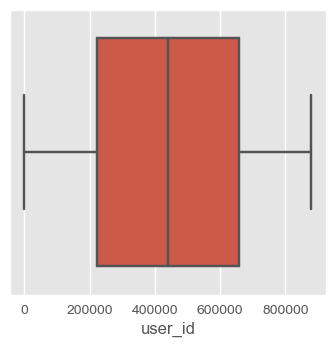

In [20]:
log_eda.check_outliers()

## User EDA

Checking Distributions...


17it [01:48,  6.41s/it]



Done!


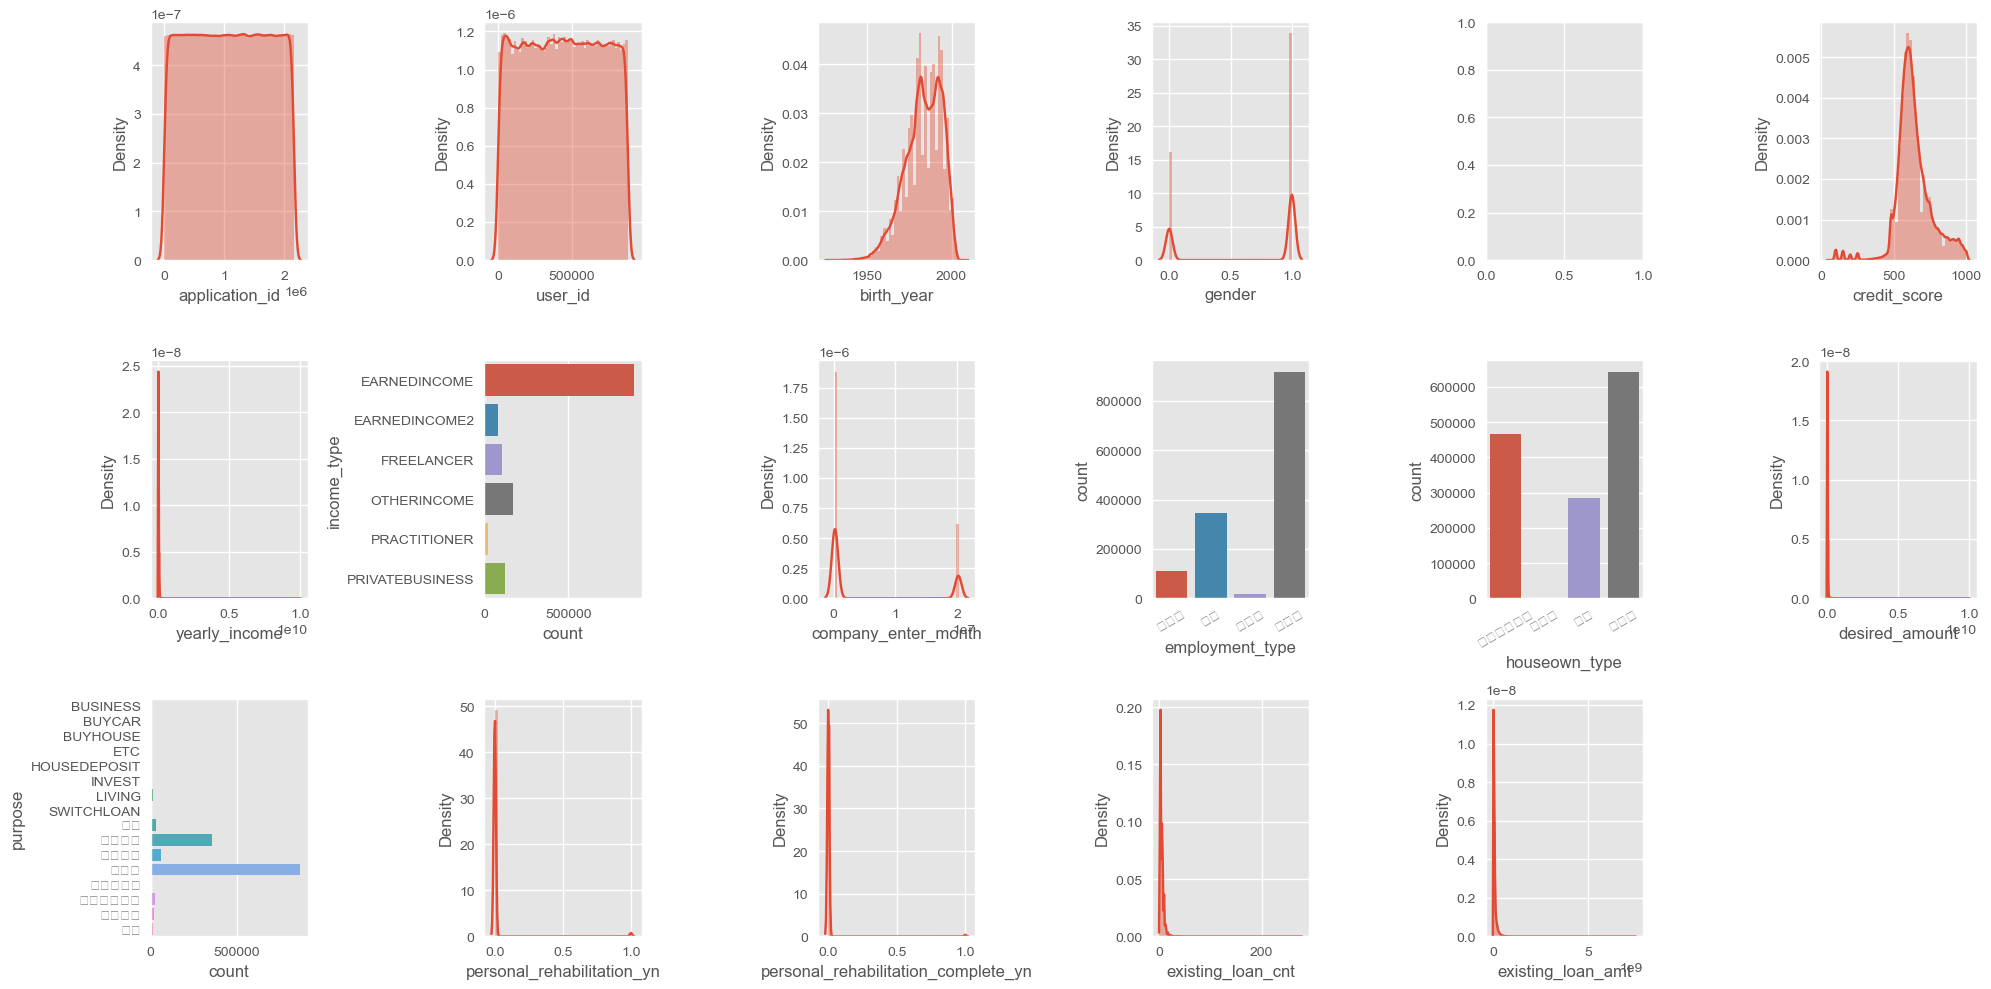

In [21]:
user_eda = EDA(user, 'user_spec')
user_eda.check_distributions()

Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
Done!!


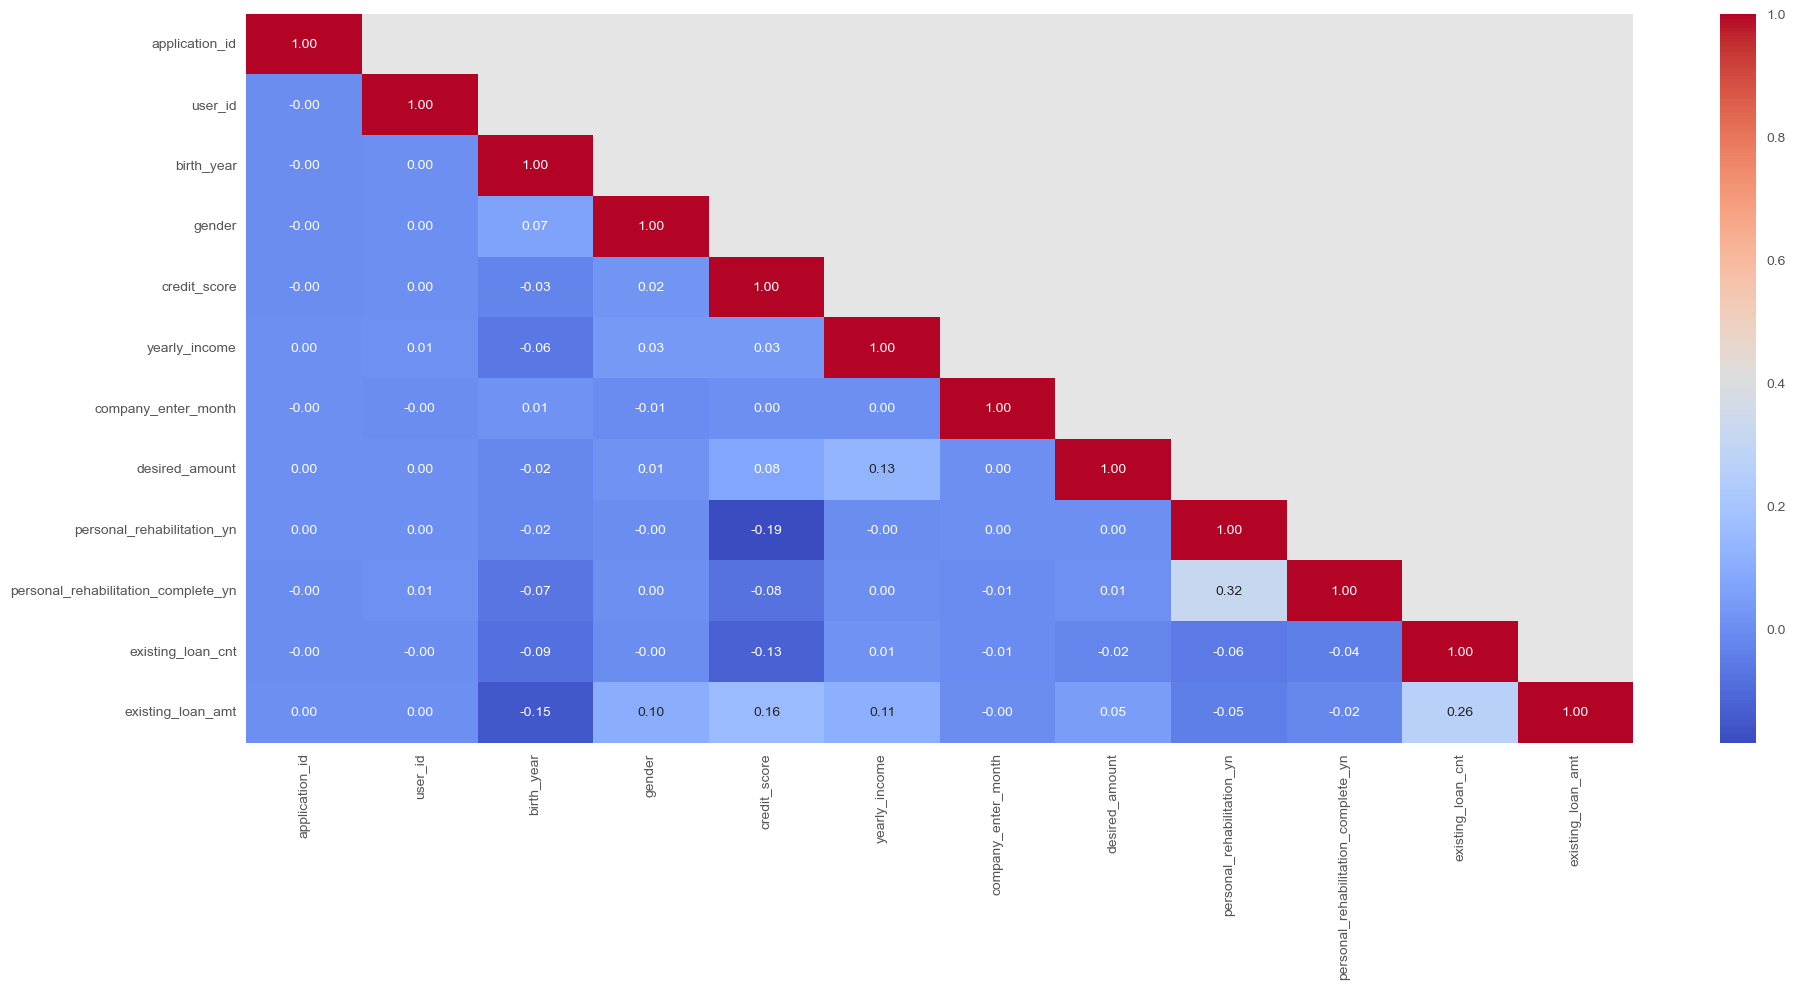

In [22]:
user_eda.check_corr()

Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
üëÄÏπºÎüº Î≥Ñ Í≤∞Ï∏°Ïπò Ïàò
	 ‚ùó application_id : 0
	 ‚ùó user_id : 0
	 ‚ùó birth_year : 12961
	 ‚ùó gender : 12961
	 ‚ùó insert_time : 0
	 ‚ùó credit_score : 105115
	 ‚ùó yearly_income : 90
	 ‚ùó income_type : 85
	 ‚ùó company_enter_month : 171760
	 ‚ùó employment_type : 85
	 ‚ùó houseown_type : 85
	 ‚ùó desired_amount : 85
	 ‚ùó purpose : 85
	 ‚ùó personal_rehabilitation_yn : 587461
	 ‚ùó personal_rehabilitation_complete_yn : 1203354
	 ‚ùó existing_loan_cnt : 198556
	 ‚ùó existing_loan_amt : 313774
Done!!


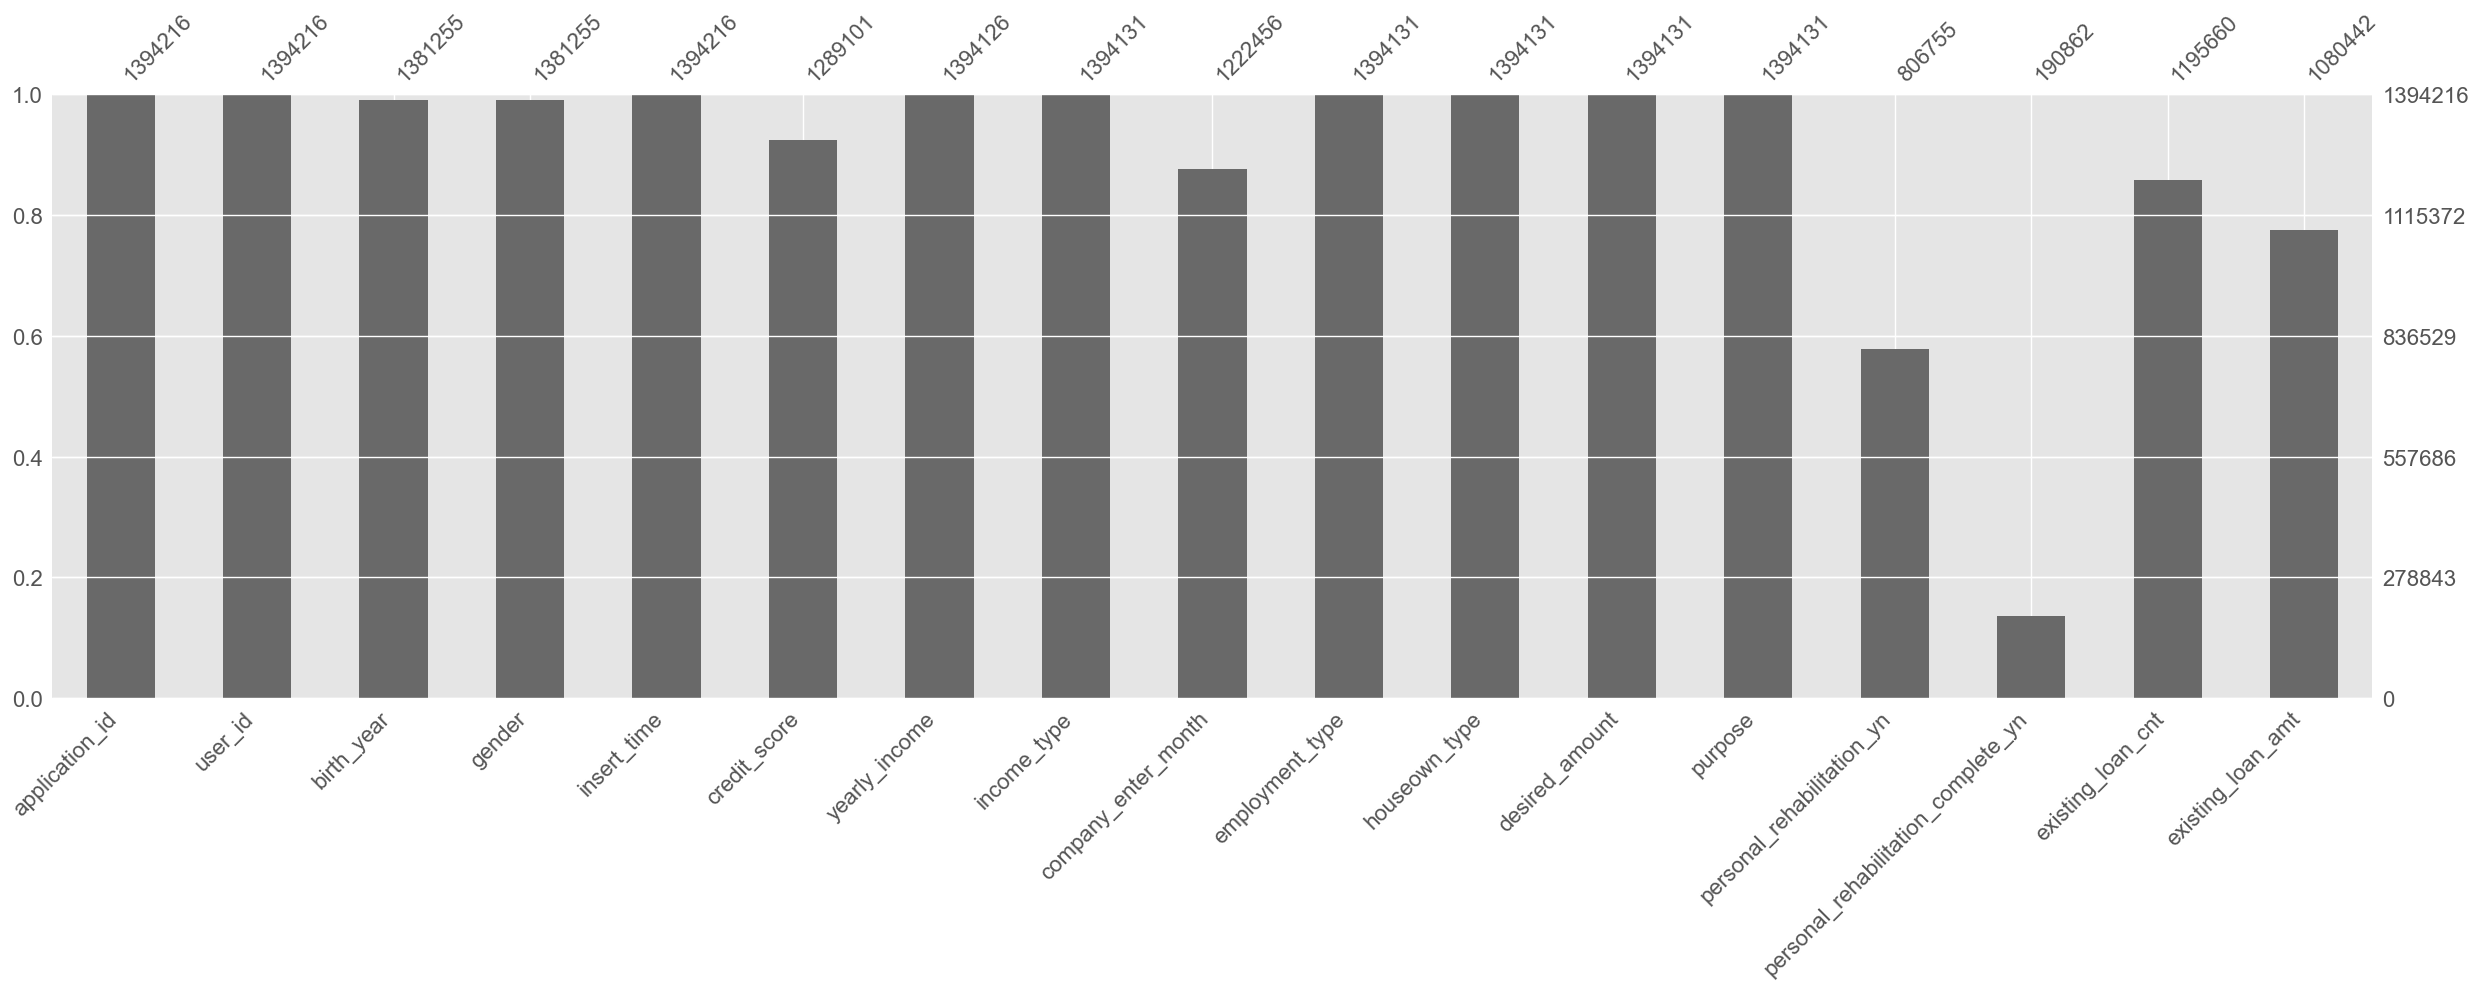

In [23]:
user_eda.check_missing_values()

Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏Ìï©ÎãàÎã§...
ÌååÏïÖÎêú Ïó∞ÏÜçÌòï Î≥ÄÏàò
 ['application_id', 'user_id', 'birth_year', 'gender', 'credit_score', 'yearly_income', 'company_enter_month', 'desired_amount', 'personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'existing_loan_cnt', 'existing_loan_amt']
Done!!


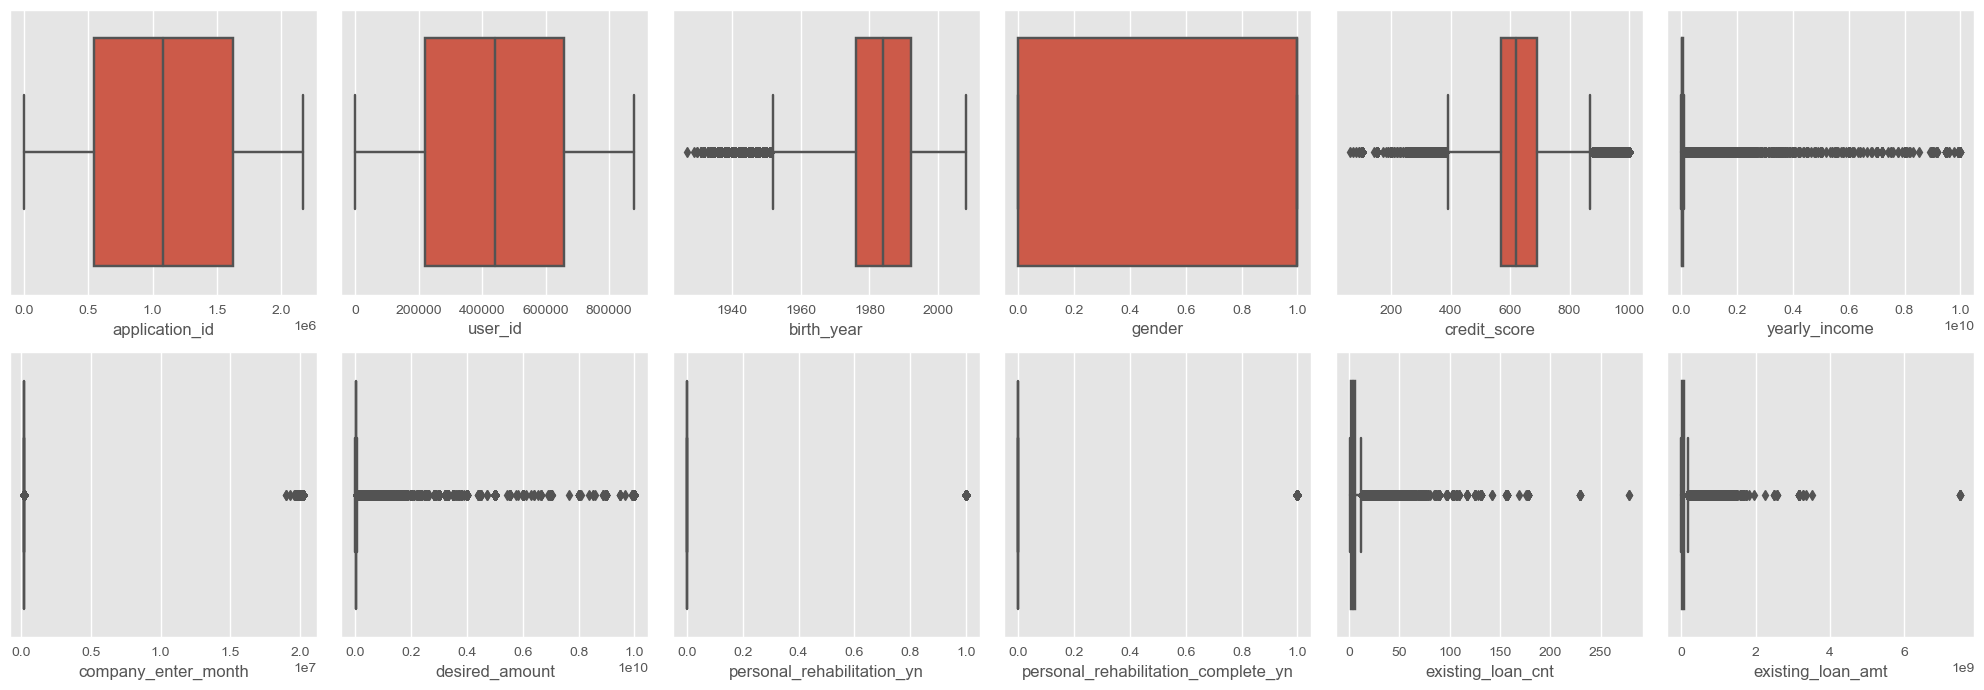

In [24]:
user_eda.check_outliers()

## Preprocess

In [6]:
prep_config = config_dict.get('Preprocessor')

# Loan preprocess
loan_preprocessor = Loan_Preprocessor(loan_df, prep_config)
prep_loan_df = loan_preprocessor.run(
    save_file_name='prep_loan.fth',
    save_mode=True
    )

ÌïÑÏöî ÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú Ï§ë...
datetimeÏúºÎ°ú Î∞îÍæ∏Îäî Ï§ë...
Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÄÎäî Ìñâ ÏÇ≠Ï†ú Ï§ë...
‚úÖ prep dataset saved at (data/prep/prep_loan.fth)


In [7]:
# Log preprocess
log_preprocessor = Log_Preprocessor(log_df, prep_config)
prep_log_df = log_preprocessor.run(
    save_file_name='prep_log.fth',
    save_mode=True
)

ÌïÑÏöî ÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú Ï§ë...
datetimeÏúºÎ°ú Î∞îÍæ∏Îäî Ï§ë...
Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî ÏãúÌÇ§Îäî Ï§ë...
ÏãúÍ∞ÑÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ Ï§ë...
‚úÖ prep dataset saved at (data/prep/prep_log.fth)


In [8]:
# User preprocess
user_preprocessor = User_Preprocessor(user_df, prep_config)
prep_user_df = user_preprocessor.run(
    save_file_name='prep_user.fth',
    save_mode=True
)

ÌïÑÏöî ÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú Ï§ë...
datetimeÏúºÎ°ú Î∞îÍæ∏Îäî Ï§ë...
ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± Ï§ë...
Ïπ¥ÌÖåÍ≥†Î¶¨Ìôî ÏãúÌÇ§Îäî Ï§ë...
ÏõêÌï´Ïù∏ÏΩîÎî© Ï§ë...
ÏàúÏÑúÌòïÏù∏ÏΩîÎî© Ï§ë...
Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÄÎäî Ìñâ ÏÇ≠Ï†ú Ï§ë...
‚úÖ prep dataset saved at (data/prep/prep_user.fth)


In [9]:
# cofix preprocess
cofix_preprocessor = Cofix_Preprocessor(cofix_df, prep_config)
prep_cofix_df = cofix_preprocessor.run(
    save_file_name='prep_cofix.fth',
    save_mode=True
)

ÎåÄÏÉÅÍ∏∞Í∞Ñ Ïó¥ ÎÇòÎàÑÎäî Ï§ë...
datetimeÏúºÎ°ú Î∞îÍæ∏Îäî Ï§ë...
ÏãúÍ∞ÑÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ Ï§ë...
COFIX Í∏àÎ¶¨ Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω Ï§ë...
‚úÖ prep dataset saved at (data/prep/prep_cofix.fth)


## Matcher

In [ ]:
matcher_config = config_dict.get('Matcher')

In [ ]:
matcher = Matcher(prep_user_df, prep_loan_df, prep_log_df, prep_cofix_df, matcher_config)

In [ ]:
train_valid_df, test_df = matcher.run(save_mode=True)

LoanÍ≥º Cofix Îß§Ïπ≠Ï§ë...
Loan_CofixÏôÄ UserÎ•º mergeÏ§ë...
Train(Valid)Í≥º TestÎ°ú ÎÇòÎàÑÎäî Ï§ë...
‚úÖ matched dataset saved at (data/match/ml_train_valid.fth)
‚úÖ matched dataset saved at (data/match/ml_test.fth)


## MICE

In [ ]:
# train
mice_train = mice(train_valid_df)
mice_train_df = mice_train.mice_1()

In [ ]:
# test
mice_test = mice(test_df)
mice_test_df = mice_test.mice_1()

In [ ]:
print(mice_train_df.shape)
print(mice_test_df.shape)

(10264386, 53)
(3255482, 53)


## Bank

In [ ]:
bank_info = Bank_info(mice_train_df)
final_train_df = bank_info.run()

## Resampling & Modeling

In [27]:
downsampled_df = down_sampling(mice_train_df) # inputÏùÑ mice_train_df ÌïòÎ©¥ Îê† Í≤É Í∞ôÏïÑÏöî
train_X, valid_X, train_Y, valid_Y = split_train_valid(downsampled_df)

Down Sampling Ï§ë...
TrainÍ≥º ValidÎ°ú ÎÇòÎàÑÎäî Ï§ë...


In [28]:
print(train_X.shape, train_Y.shape, valid_X.shape, valid_Y.shape )

(887537, 52) (887537,) (221885, 52) (221885,)


In [76]:
NUM_DOWN_SAMPLING = 30

for sampling_idx in range(NUM_DOWN_SAMPLING):
    
    print(f'‚úÖ Sampling #{sampling_idx}')
    
    # Resampling & split
    downsampled_df = down_sampling(mice_train_df) # inputÏùÑ mice_train_df ÌïòÎ©¥ Îê† Í≤É Í∞ôÏïÑÏöî
    train_X, train_Y, valid_X, valid_Y = split_train_valid(downsampled_df)
    
    # TODO: Modeling
    from src.models.rf_model import RF
    random_state = 42
    rf = RF(train_X, train_Y, valid_X, valid_Y, random_state)
    best_model = rf.grid_search()
    # TODO : Model results storing (e.g. wandb, Dataframe...?)
    # TODO : Voting (soft or hard voting)
    
    # del train_X, train_Y, valid_X, valid_Y # Free memory for long iterations
    # break

‚úÖ Sampling0
Down Sampling Ï§ë...
TrainÍ≥º ValidÎ°ú ÎÇòÎàÑÎäî Ï§ë...


# Ïó¨Í∏∞ Ïù¥ÌõÑÎ°ú Î∂àÌïÑÏöîÌïú ÏÖÄ Ï†ïÎ¶¨ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§

## Modeling

In [88]:
# base line
# model_name : RF, XGB, LGBM, 

## Î™®Îç∏ ÏÑúÏπò ##
# from src.models import XGB
# random_state = 42
# xgb = XGB(train_X, train_Y, val_X, val_Y, test_X, test_Y, random_state)
# best_model = xgb.grid_search()

## test Í≤∞Í≥º ÌôïÏù∏ Î∞è Î™®Îç∏ Ìï¥ÏÑù ##
# xgb.test_score(best_model)
# xgb.confusion_matrix(best_model)
# xgb.feature_importance(best_model)
# xgb.shap(best_model)


In [5]:
from src.models.rf_model import RF

In [1]:
from src.models.lgbm_model import LGBM

/Users/hanjun/opt/anaconda3/envs/bigcon/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.models.xgb_model import XGB

In [3]:
from src.models.catboost import CB

# Clustering

In [ ]:
def viz (df : pd.DataFrame, clus_col) :
    '''
    Input : ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ, Íµ∞ÏßëÌôîÍ∞Ä ÏûàÎäî Column 
    '''

    print('ÏàòÏπòÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.')
    from sklearn.decomposition import PCA

    con_cols = [i for i in df.columns if df[i].dtype != 'object' and i != 'user_id']

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    feature_df = df.loc[:, con_cols]
    
    scaler = MinMaxScaler()
    scaled_feature_df = scaler.fit_transform(feature_df)
    



    # feature_df.dropna(axis=0, inplace=True)
    feature_df.reset_index(drop=True, inplace=True)

    pca_2 = PCA(n_components=2)
    pca_2_transformed = pca_2.fit_transform(scaled_feature_df)

    pca_2_df = pd.DataFrame({'x_axis' : pca_2_transformed[:,0],
                            'y_axis' : pca_2_transformed[:,1],
                            'Cluster' : df[clus_col]})

    pca_3 = PCA(n_components=3)
    pca_3_transformed = pca_3.fit_transform(scaled_feature_df)
    pca_3_df = pd.DataFrame({'x_axis' : pca_3_transformed[:, 0],
                    'y_axis' : pca_3_transformed[:, 1],
                    'z_axis' : pca_3_transformed[:, 2],
                    'Cluster' : df[clus_col]})


    for i in range(len(pca_2_df['Cluster'].unique())) :
        marker_i = pca_2_df[pca_2_df['Cluster'] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    ax1.set_title('Clustering 2D Visualization')
    ax1.legend()

    for i in range(len(pca_3_df['Cluster'].unique())) :
        marker_i = pca_3_df[pca_3_df['Cluster'] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    ax2.set_title('Clustering 3D Visualization')
    ax2.legend()

    plt.show()


    '''
    Input : ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ, Íµ∞ÏßëÌôîÍ∞Ä ÏûàÎäî Column 
    '''

    print('ÏàòÏπòÌòï Î≥ÄÏàòÏôÄ ÌäπÏ†ï Î≥ÄÏàòÏóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.')
    from sklearn.decomposition import PCA

    con_cols = [i for i in df.columns if df[i].dtype != 'object']

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    feature_df = df.loc[:, con_cols]
    
    scaler = MinMaxScaler()
    scaled_feature_df = scaler.fit_transform(feature_df)
    



    # feature_df.dropna(axis=0, inplace=True)
    feature_df.reset_index(drop=True, inplace=True)

    pca_2 = PCA(n_components=2)
    pca_2_transformed = pca_2.fit_transform(scaled_feature_df)

    pca_2_df = pd.DataFrame({'x_axis' : pca_2_transformed[:,0],
                            'y_axis' : pca_2_transformed[:,1],
                            'Cluster' : df[clus_col],
                            something : df[something]})

    pca_3 = PCA(n_components=3)
    pca_3_transformed = pca_3.fit_transform(scaled_feature_df)
    pca_3_df = pd.DataFrame({'x_axis' : pca_3_transformed[:, 0],
                    'y_axis' : pca_3_transformed[:, 1],
                    'z_axis' : pca_3_transformed[:, 2],
                    'Cluster' : df[clus_col],
                    something : df[something]})


    for i in range(len(pca_2_df['Cluster'].unique())) :
        marker_i = pca_2_df[pca_2_df['Cluster'] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.3)

    for i in pca_2_df[something].unique() :
        marker_i = pca_2_df[pca_2_df[something] == i].index
        ax1.scatter(x = pca_2_df.loc[marker_i, 'x_axis'],
                    y = pca_2_df.loc[marker_i, 'y_axis'],
                    label = f'{something}_{i}',
                    alpha = 0.3)

    ax1.set_title('Clustering 2D Visualization')
    ax1.legend()

    for i in pca_3_df['Cluster'].unique() :
        marker_i = pca_3_df[pca_3_df['Cluster'] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'Cluster {i}',
                    alpha = 0.5)

    for i in pca_3_df[something].unique() :
        marker_i = pca_3_df[pca_3_df[something] == i].index
        ax2.scatter(xs = pca_3_df.loc[marker_i, 'x_axis'],
                    ys= pca_3_df.loc[marker_i, 'y_axis'],
                    zs =  pca_3_df.loc[marker_i, 'z_axis'],
                    label = f'{something}_{i}',
                    alpha = 0.5)

    ax2.set_title('Clustering 3D Visualization')
    ax2.legend()

    plt.show()

## General Clustering

In [ ]:
'''
Example
1. Í∑∏ÎÉ• Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò ÏãúÍ∞ÅÌôî
clus = ClusteringPreprocessor(df)
clus.run()

2. Extracction Ïù¥ÌõÑÏùò ÏãúÍ∞ÅÌôî
clus = ClusteringPreprocessor(df, extraction=True)
clus.run()

3. Selection Ïù¥ÌõÑÏùò ÏãúÍ∞ÅÌôî
clus = ClusteringPReprocesor(df, selection=True)
clus.run()
'''

Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...
Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Ï†Ñ :  3025600
Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ :  0


Progress bar:   0%|          | 0/36 [00:00<?, ?it/s]

Scaling ÏôÑÎ£å
Ï¥ù 4Í∞úÏùò DataFrameÏù¥ ÎÇòÏôîÏäµÎãàÎã§. shape : (118255, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118255 entries, 0 to 118254
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   gender_0.0                               118255 non-null  float64
 1   gender_1.0                               118255 non-null  float64
 2   income_type_EARNEDINCOME                 118255 non-null  float64
 3   income_type_EARNEDINCOME2                118255 non-null  float64
 4   income_type_FREELANCER                   118255 non-null  float64
 5   income_type_PRACTITIONER                 118255 non-null  float64
 6   income_type_PRIVATEBUSINESS              118255 non-null  float64
 7   employment_type_Í≥ÑÏïΩÏßÅ                      118255 non-null  float64
 8   employment_type_Í∏∞ÌÉÄ                       118255 non-null  float64
 9   employment_type

Progress bar:   0%|          | 0/36 [00:00<?, ?it/s]

Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar:   0%|          | 0/36 [00:00<?, ?it/s]

Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar:   0%|          | 0/36 [00:00<?, ?it/s]

Selected Columns
 Index(['age', 'yearly_income', 'credit_score', 'existing_loan_amt',
       'existing_loan_percent', 'income_per_credit', 'desired_amount',
       'existing_loan_cnt', 'service_year', 'personal_rehabilitation_yn_0.0'],
      dtype='object')


Progress bar: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 36/36 [00:19<00:00,  1.85it/s]


Selected Columns
 Index(['existing_loan_amt', 'income_per_credit', 'age', 'credit_score',
       'existing_loan_percent', 'desired_amount', 'existing_loan_cnt',
       'service_year', 'gender_0.0', 'income_type_PRIVATEBUSINESS'],
      dtype='object')
ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§...
ÌòÑÏû¨ Scaler :  StandardScaler


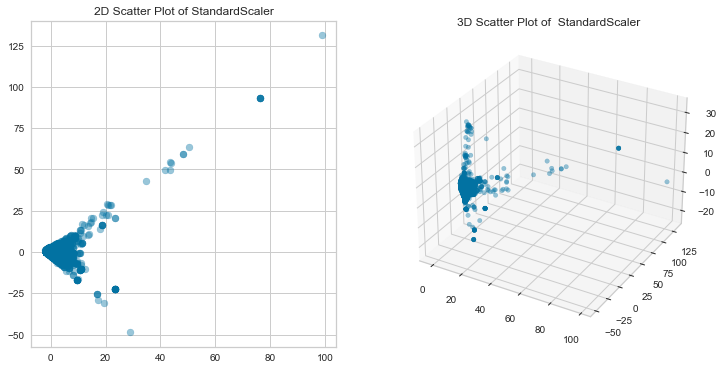

ÌòÑÏû¨ Scaler :  MinMaxScaler


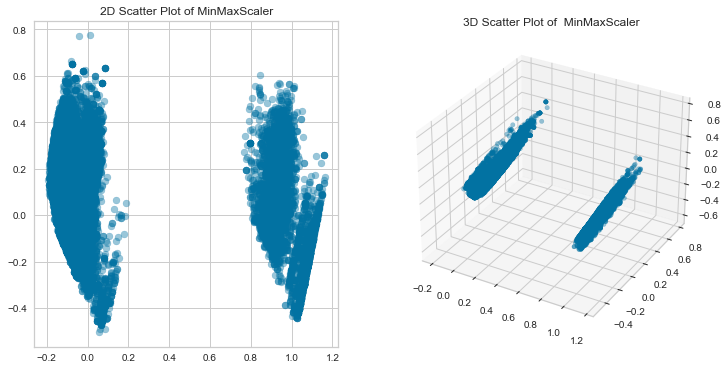

ÌòÑÏû¨ Scaler :  RobustScaler


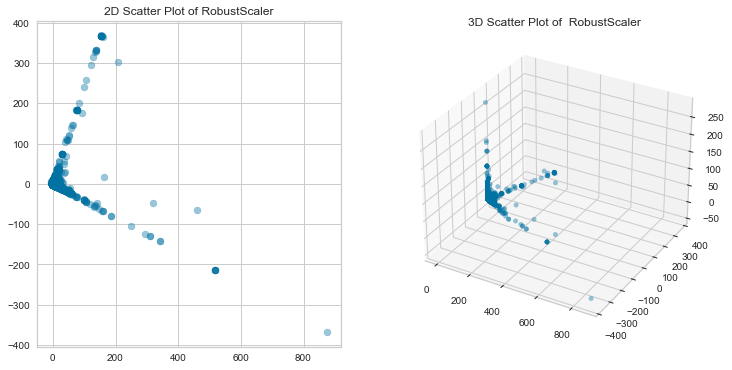

ÌòÑÏû¨ Scaler :  PowerTransformer


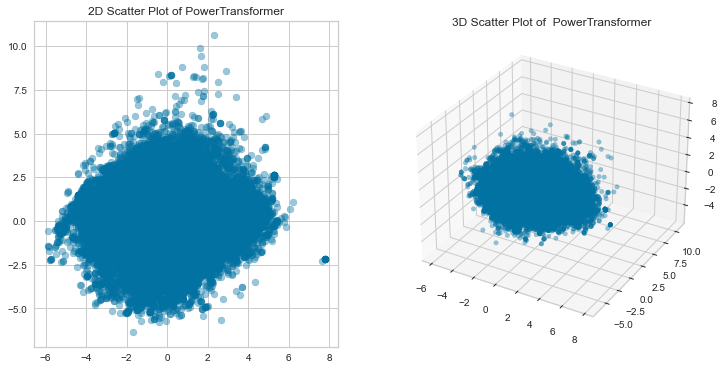

Selection Í≤∞Í≥º DF ListÎ•º Î∞òÌôòÌï©ÎãàÎã§.


([             age  yearly_income  credit_score  existing_loan_amt  \
  0      -1.322321      -0.052633      0.076047          -0.539754   
  1      -1.322321      -0.152975     -0.703244          -0.504317   
  2       1.143561       0.210762      0.153976           0.003607   
  3      -0.089380      -0.353657     -0.469457          -0.457068   
  4       1.020267       0.260933     -0.781173           0.405222   
  ...          ...            ...           ...                ...   
  118250 -0.089380      -0.479084     -0.235669          -0.657876   
  118251  0.403797      -0.190603     -0.001882          -0.622439   
  118252 -0.582557      -0.002463     -0.235669           0.133541   
  118253 -0.089380      -0.077719     -0.157740          -0.185388   
  118254 -0.952439       0.047708      0.231905          -0.468880   
  
          existing_loan_percent  income_per_credit  desired_amount  \
  0                   -0.365583          -0.081740       -0.139417   
  1              

In [11]:
from src.clustering import Clustering
from src.clustering_preprocessor import ClusteringPreprocessor

df = pd.read_csv('./data/user_spec.csv')

clus = ClusteringPreprocessor(df, selection=True)
selection_list, fitted_scaler, ori_df = clus.run()
selection_list, fitted_scaler, ori_df


K-MeansÎ°ú Íµ∞ÏßëÌôî ÏàòÌñâ Ï§ë...


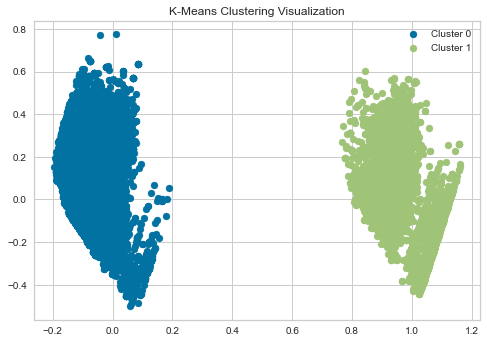

Gaussian MixtureÎ°ú Íµ∞ÏßëÌôî Ï§ë...


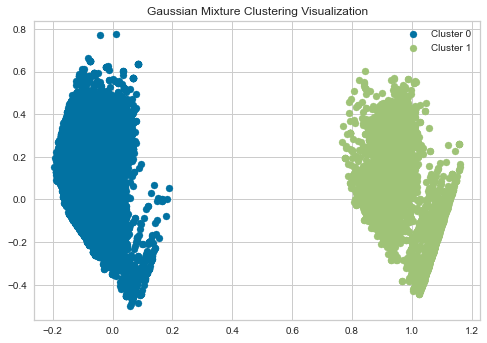

age  yearly_income  credit_score  existing_loan_amt  \
0       0.049180       0.003821      0.588889           0.005057   
1       0.049180       0.002948      0.477778           0.006005   
2       0.377049       0.006114      0.600000           0.019595   
3       0.213115       0.001201      0.511111           0.007269   
4       0.360656       0.006551      0.466667           0.030341   
...          ...            ...           ...                ...   
118250  0.213115       0.000109      0.544444           0.001896   
118251  0.278689       0.002620      0.577778           0.002845   
118252  0.147541       0.004258      0.544444           0.023072   
118253  0.213115       0.003603      0.555556           0.014539   
118254  0.098361       0.004695      0.611111           0.006953   

        existing_loan_percent  income_per_credit  desired_amount  \
0                    0.000997           0.001726          0.0005   
1                    0.001521           0.001593          0.0003   
2                    0.002439           0.002708          0.0025   
3                    0.004297           0.000627          0.0003   
4                    0.003529           0.003577          0.0005   
...                       ...                ...             ...   
118250               0.006726           0.000072          0.0050   
118251               0.000807           0.001208          0.0030   
118252               0.004092           0.002053          0.0003   
118253               0.003034           0.001711          0.0001   
118254               0.001121           0.002050          0.0030   

        existing_loan_cnt  service_year  personal_rehabilitation_yn_0.0  KM  \
0                0.000000      0.019231                             1.0   0   
1                0.017544      0.000000                             1.0   0   
2                0.013158      0.000000                             1.0   0   
3                0.039474      0.019231                             1.0   0   
4                0.026316      0.057692                             1.0   0   
...                   ...           ...                             ...  ..   
118250           0.004386      0.096154                             0.0   1   
118251           0.008772      0.038462                             1.0   0   
118252           0.030702      0.019231                             1.0   0   
118253           0.017544      0.019231                             1.0   0   
118254           0.017544      0.000000                             1.0   0   

        GM  
0        0  
1        0  
2        0  
3        0  
4        0  
...     ..  
118250   1  
118251   0  
118252   0  
118253   0  
118254   0  

[118255 rows x 12 columns]

In [12]:
mm_df = selection_list[1]

clus = Clustering(mm_df, scaled=True, num_clus=2)
fin_df = clus.run()
fin_df

In [13]:
from sklearn.metrics import silhouette_score

score_km = silhouette_score(mm_df, fin_df['KM'])
score_gm = silhouette_score(mm_df, fin_df['GM'])

print(f'{score_km:.2f}')
print(f'{score_gm:.2f}')

0.78
0.78


In [14]:
clus_0 = fin_df[fin_df['KM'] == 0]
clus_1 = fin_df[fin_df['KM'] == 1]

In [ ]:
clus_0.describe()

age  yearly_income   credit_score  existing_loan_amt  \
count  111301.000000  111301.000000  111301.000000      111301.000000   
mean        0.216976       0.004280       0.590887           0.020001   
std         0.126783       0.008511       0.121075           0.027302   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.131148       0.002730       0.511111           0.006005   
50%         0.196721       0.003385       0.566667           0.012642   
75%         0.295082       0.004695       0.644444           0.022756   
max         1.000000       1.000000       1.000000           1.000000   

       existing_loan_percent  income_per_credit  desired_amount  \
count          111301.000000      111301.000000   111301.000000   
mean                0.004101           0.001947        0.002616   
std                 0.008423           0.003189        0.014201   
min                 0.000000           0.000000        0.000000   
25%                 0.001401           0.001249        0.000500   
50%                 0.002803           0.001616        0.001000   
75%                 0.004634           0.002149        0.003000   
max                 1.000000           0.327706        1.000000   

       existing_loan_cnt   service_year  personal_rehabilitation_yn_0.0  \
count      111301.000000  111301.000000                        111301.0   
mean            0.016868       0.050438                             1.0   
std             0.020677       0.071727                             0.0   
min             0.000000       0.000000                             1.0   
25%             0.004386       0.000000                             1.0   
50%             0.013158       0.019231                             1.0   
75%             0.021930       0.057692                             1.0   
max             1.000000       0.903846                             1.0   

             KM  
count  111301.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

In [ ]:
clus_1.describe()

age  yearly_income  credit_score  existing_loan_amt  \
count  6954.000000    6954.000000   6954.000000        6954.000000   
mean      0.353411       0.004275      0.372518           0.011463   
std       0.160789       0.011364      0.257304           0.013259   
min       0.000000       0.000000      0.000000           0.000000   
25%       0.229508       0.002620      0.000000           0.003477   
50%       0.344262       0.003385      0.477778           0.008217   
75%       0.459016       0.004586      0.566667           0.014855   
max       0.934426       0.491211      1.000000           0.336283   

       existing_loan_percent  income_per_credit  desired_amount  \
count            6954.000000        6954.000000     6954.000000   
mean                0.003667           0.005209        0.002884   
std                 0.008408           0.016173        0.027380   
min                 0.000000           0.000002        0.000000   
25%                 0.000817           0.001415        0.000300   
50%                 0.001868           0.002172        0.001000   
75%                 0.003408           0.006688        0.002000   
max                 0.230194           1.000000        1.000000   

       existing_loan_cnt  service_year  personal_rehabilitation_yn_0.0      KM  
count        6954.000000   6954.000000                          6954.0  6954.0  
mean            0.009085      0.057988                             0.0     1.0  
std             0.011777      0.086873                             0.0     0.0  
min             0.000000      0.000000                             0.0     1.0  
25%             0.000000      0.019231                             0.0     1.0  
50%             0.004386      0.019231                             0.0     1.0  
75%             0.013158      0.076923                             0.0     1.0  
max             0.254386      1.000000                             0.0     1.0

In [20]:
import pingouin as pg

cols = [i for i in clus_0.columns if i != 'KM' and i !='GM']

values = []

for i in cols :

    ttest = pg.ttest(clus_0[i], clus_1[i], correction='auto')

    values.append(ttest['p-val'].values[0])

ttest_df = pd.DataFrame(values, columns=['P-Value'], index = cols)

TF = [True if i < 0.05 else False for i in ttest_df['P-Value']]

ttest_df['Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥'] = TF
ttest_df

# ''' 
# Í≤∞Í≥º : Ïó∞ÏÜåÎìùÍ≥º ÎåÄÏ∂úÌù¨ÎßùÍ∏àÏï°ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Selected ColumnÏóêÏÑú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî Í≤ÉÏúºÎ°ú ÌôïÏù∏Îê®
# '''


P-Value  Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥
age                             0.000000e+00     True
yearly_income                   9.739454e-01    False
credit_score                    0.000000e+00     True
existing_loan_amt               0.000000e+00     True
existing_loan_percent           3.010648e-05     True
income_per_credit               4.009306e-62     True
desired_amount                  4.192735e-01    False
existing_loan_cnt               0.000000e+00     True
service_year                    1.378010e-12     True
personal_rehabilitation_yn_0.0  0.000000e+00     True

In [23]:
scaler = fitted_scaler[1] ## ÏõêÎûò ÌïôÏäµÎêòÏñ¥ ÏûàÎçò MinMaxÎ•º Í∞ÄÏ†∏Ïò¥

clus_0_recol = clus_0[['age', 'credit_score', 'yearly_income','service_year',
                                'desired_amount', 'existing_loan_cnt', 'existing_loan_amt',
                                'income_per_credit', 'existing_loan_percent']]

clus_0_ori = scaler.inverse_transform(clus_0_recol)
                                
clus_0_ori_df = pd.DataFrame(clus_0_ori, columns = clus_0_recol.columns)

clus_0_ori_df['personal_rehabilitation_yn_0.0'] = clus_0['personal_rehabilitation_yn_0.0']
clus_0_ori_df

age  credit_score  yearly_income  service_year  desired_amount  \
0       22.0         630.0     36000000.0           1.0       5000000.0   
1       22.0         530.0     28000000.0           0.0       3000000.0   
2       42.0         640.0     57000000.0           0.0      25000000.0   
3       32.0         560.0     12000000.0           1.0       3000000.0   
4       41.0         520.0     61000000.0           3.0       5000000.0   
...      ...           ...            ...           ...             ...   
111296  29.0         540.0     36000000.0           1.0       3000000.0   
111297  36.0         620.0     25000000.0           2.0      30000000.0   
111298  28.0         590.0     40000000.0           1.0       3000000.0   
111299  32.0         600.0     34000000.0           1.0       1000000.0   
111300  25.0         650.0     44000000.0           0.0      30000000.0   

        existing_loan_cnt  existing_loan_amt  income_per_credit  \
0                     1.0         16000000.0       57142.857143   
1                     5.0         19000000.0       52830.188679   
2                     4.0         62000000.0       89062.500000   
3                    10.0         23000000.0       21428.571429   
4                     7.0         96000000.0      117307.692308   
...                   ...                ...                ...   
111296                4.0         60000000.0       66666.666667   
111297                3.0          9000000.0       40322.580645   
111298                8.0         73000000.0       67796.610169   
111299                5.0         46000000.0       56666.666667   
111300                5.0         22000000.0       67692.307692   

        existing_loan_percent  personal_rehabilitation_yn_0.0  
0                    0.444444                             1.0  
1                    0.678571                             1.0  
2                    1.087719                             1.0  
3                    1.916667                             1.0  
4                    1.573770                             1.0  
...                       ...                             ...  
111296               1.666667                             1.0  
111297               0.360000                             1.0  
111298               1.825000                             1.0  
111299               1.352941                             1.0  
111300               0.500000                             1.0  

[111301 rows x 10 columns]

In [27]:
scaler = fitted_scaler[1] ## ÏõêÎûò ÌïôÏäµÎêòÏñ¥ ÏûàÎçò MinMaxÎ•º Í∞ÄÏ†∏Ïò¥

clus_1_recol = clus_1[['age', 'credit_score', 'yearly_income','service_year',
                                'desired_amount', 'existing_loan_cnt', 'existing_loan_amt',
                                'income_per_credit', 'existing_loan_percent']]

clus_1_ori = scaler.inverse_transform(clus_1_recol)
                                
clus_1_ori_df = pd.DataFrame(clus_1_ori, columns = clus_1_recol.columns)

clus_1_ori_df['personal_rehabilitation_yn_0.0'] = clus_1['personal_rehabilitation_yn_0.0']
clus_1_ori_df

age  credit_score  yearly_income  service_year  desired_amount  \
0     46.0         100.0     50000000.0           8.0       5000000.0   
1     46.0         540.0     40000000.0           3.0      15000000.0   
2     36.0         250.0     30000000.0           2.0       1000000.0   
3     46.0         600.0     35000000.0           0.0       3000000.0   
4     32.0         580.0     55000000.0           6.0       5000000.0   
...    ...           ...            ...           ...             ...   
6949  39.0         710.0      3000000.0           0.0      30000000.0   
6950  39.0         710.0      3000000.0           0.0      30000000.0   
6951  34.0         470.0     33000000.0           4.0      10000000.0   
6952  58.0         100.0     50000000.0           2.0      15000000.0   
6953  32.0         590.0      2000000.0           5.0      50000000.0   

      existing_loan_cnt  existing_loan_amt  income_per_credit  \
0                   1.0         25000000.0      500000.000000   
1                   2.0         64000000.0       74074.074074   
2                   5.0         37000000.0      120000.000000   
3                   2.0          9000000.0       58333.333333   
4                   3.0         67000000.0       94827.586207   
...                 ...                ...                ...   
6949                6.0         70000000.0        4225.352113   
6950                6.0         70000000.0        4225.352113   
6951                2.0          9000000.0       70212.765957   
6952                3.0         21000000.0      500000.000000   
6953                2.0          6000000.0        3389.830508   

      existing_loan_percent  personal_rehabilitation_yn_0.0  
0                  0.500000                             NaN  
1                  1.600000                             NaN  
2                  1.233333                             NaN  
3                  0.257143                             NaN  
4                  1.218182                             NaN  
...                     ...                             ...  
6949              23.333333                             NaN  
6950              23.333333                             NaN  
6951               0.272727                             NaN  
6952               0.420000                             NaN  
6953               3.000000                             NaN  

[6954 rows x 10 columns]

In [33]:
## Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ ÌñàÎçò Î≥ÄÏàòÎì§
significant_cols = ['age', 'credit_score', 'existing_loan_amt', 
'existing_loan_percent', 'income_per_credit','existing_loan_cnt', 
'service_year', 'personal_rehabilitation_yn_0.0']

clus_0_ori_sig = clus_0_ori_df[significant_cols]
clus_1_ori_sig = clus_1_ori_df[significant_cols]


clus_0_means = [clus_0_ori_sig[i].mean() for i in significant_cols]
clus_1_means = [clus_1_ori_sig[i].mean() for i in significant_cols]

significant_df = pd.DataFrame()

significant_df['CLUSTER 0'] = clus_0_means
significant_df['CLUSTER 1'] = clus_1_means


pd.options.display.float_format = '{:.5f}'.format

significant_df.index = significant_cols
significant_df

CLUSTER 0      CLUSTER 1
age                                  32.23552       40.55810
credit_score                        631.79864      435.26603
existing_loan_amt              63283106.17155 36270204.19902
existing_loan_percent                 1.82912        1.63557
income_per_credit                 64333.13440   170347.86638
existing_loan_cnt                     4.84581        3.07147
service_year                          2.62276        3.01539
personal_rehabilitation_yn_0.0        1.00000        0.00000

In [34]:
values = []

for i in significant_cols :

    ttest = pg.ttest(clus_0_ori_sig[i], clus_1_ori_sig[i], correction='auto')

    values.append(ttest['p-val'].values[0])

ttest_df_ori_ver = pd.DataFrame(values, columns=['P-Value'], index = significant_cols)

TF = [True if i < 0.05 else False for i in ttest_df_ori_ver['P-Value']]

ttest_df_ori_ver['Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥'] = TF
ttest_df_ori_ver

P-Value  Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥
age                             0.00000     True
credit_score                    0.00000     True
existing_loan_amt               0.00000     True
existing_loan_percent           0.00003     True
income_per_credit               0.00000     True
existing_loan_cnt               0.00000     True
service_year                    0.00000     True
personal_rehabilitation_yn_0.0  0.00000     True

## K-Prototype Clustering

In [ ]:
df = pd.read_csv('./data/user_spec.csv')

kproto = KPrototype(df, n_clus = 3)

kproto_clus_df, group_by = kproto.run()
kproto_clus_df

In [ ]:
viz(kproto_clus_df, 'KProto')

In [ ]:
group_by

## Inference

## Evaluation